In [17]:
#程式碼取自 博碩, "Python 機器學習", ISBN 978-986-434-140-5, by Sebastian Raschka, 為練習Python函式庫用途
#僅供履歷作品集使用
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [18]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    x_test, y_test = X[test_idx,:], y[test_idx] 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1],alpha=0.8,c=cmap(idx), marker = markers[idx], label = cl)
        
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha = 1.0, linewidth = 1, marker = 'o', s =55, label='test set')

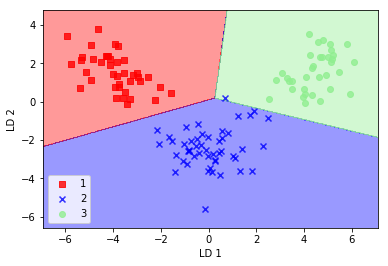

In [19]:
from sklearn.lda import LDA
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std, y_train)

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc ='lower left')
plt.show()

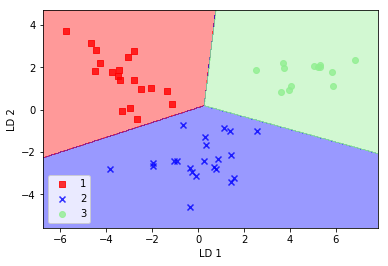

In [20]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()